In [130]:
import pandas as pd
import os

# ============================================================
# Step 1: Set the data folder and define the years to load
# ============================================================
data_folder = "../data/"  # Adjust this path if necessary
years = [2015, 2016, 2017, 2018, 2019]

# ============================================================
# Step 2: Define a unified column mapping for all datasets
# ============================================================
column_map = {
    "Happiness Rank": "Rank",              # For 2015–2016 raw data
    "Overall rank": "Rank",                # For 2018/2019 raw data
    "Happiness.Rank": "Rank",              # For 2017 raw data
    "Happiness.Score": "Score",
    "Happiness Score": "Score",
    "Country": "Country",
    "Country or region": "Country",
    "Country name": "Country",
    "Economy (GDP per Capita)": "GDP",
    "GDP per capita": "GDP",
    "Economy..GDP.per.Capita.": "GDP",
    "Health (Life Expectancy)": "Health",
    "Healthy life expectancy": "Health",
    "Health..Life.Expectancy.": "Health",
    "Freedom": "Freedom",
    "Freedom to make life choices": "Freedom",
    "Generosity": "Generosity",
    "Trust (Government Corruption)": "Trust",
    "Perceptions of corruption": "Trust",
    "Trust..Government.Corruption.": "Trust",
    "Social support": "Social Support",
    "Family": "Social Support"
}

# ============================================================
# Step 3: Define the expected columns in the final dataset
# ============================================================
expected_cols = [
     "Country", "Year","Rank", "Score", "GDP",
    "Social Support", "Health", "Freedom", "Generosity", "Trust",
]

# ============================================================
# Step 4: Define a loader function to process each file
# ============================================================
def load_clean_file(year):
    file_path = os.path.join(data_folder, f"{year}.csv")
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Ensure there's a proper 'Year' column
    df["Year"] = year  # Force assign the year
    
    # Rename columns using the unified column_map (only if those keys exist)
    df.rename(columns=column_map, inplace=True)
    
    # Remove any extra whitespace from column names
    df.columns = df.columns.str.strip()
    
    # Keep only the expected columns that exist in this DataFrame
    final_cols = [col for col in expected_cols if col in df.columns]
    df = df[final_cols]
    
    return df

# ============================================================
# Step 5: Load and combine all years into one DataFrame
# ============================================================
combined_df = pd.concat([load_clean_file(year) for year in years], ignore_index=True)

# ============================================================
# Step 6: Save the final cleaned dataset to a CSV file
# ============================================================
final_file_path = os.path.join(data_folder, "world_happiness_final.csv")
combined_df.to_csv(final_file_path, index=False)

print("✅ Final cleaned dataset saved as", final_file_path)
print("\nYear counts in final dataset:")
print(combined_df["Year"].value_counts().sort_index())
print("\nFirst 5 rows of the final dataset:")
print(combined_df.head())


✅ Final cleaned dataset saved as ../data/world_happiness_final.csv

Year counts in final dataset:
Year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: count, dtype: int64

First 5 rows of the final dataset:
       Country  Year  Rank  Score      GDP  Social Support   Health  Freedom  \
0  Switzerland  2015     1  7.587  1.39651         1.34951  0.94143  0.66557   
1      Iceland  2015     2  7.561  1.30232         1.40223  0.94784  0.62877   
2      Denmark  2015     3  7.527  1.32548         1.36058  0.87464  0.64938   
3       Norway  2015     4  7.522  1.45900         1.33095  0.88521  0.66973   
4       Canada  2015     5  7.427  1.32629         1.32261  0.90563  0.63297   

   Generosity    Trust  
0     0.29678  0.41978  
1     0.43630  0.14145  
2     0.34139  0.48357  
3     0.34699  0.36503  
4     0.45811  0.32957  


In [131]:
# Check for missing values in the combined dataset
print("Missing values per column:")
print(combined_df.isnull().sum())

# Optionally, show a summary info
print("\nDataset info:")
combined_df.info()


Missing values per column:
Country           0
Year              0
Rank              0
Score             0
GDP               0
Social Support    0
Health            0
Freedom           0
Generosity        0
Trust             1
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         782 non-null    object 
 1   Year            782 non-null    int64  
 2   Rank            782 non-null    int64  
 3   Score           782 non-null    float64
 4   GDP             782 non-null    float64
 5   Social Support  782 non-null    float64
 6   Health          782 non-null    float64
 7   Freedom         782 non-null    float64
 8   Generosity      782 non-null    float64
 9   Trust           781 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [132]:
combined_df["Trust"] = combined_df.groupby("Year")["Trust"].transform(lambda x: x.fillna(x.mean()))

# Check again
print("\nMissing values per column after filling Trust with year-wise mean:")
print(combined_df.isnull().sum())



Missing values per column after filling Trust with year-wise mean:
Country           0
Year              0
Rank              0
Score             0
GDP               0
Social Support    0
Health            0
Freedom           0
Generosity        0
Trust             0
dtype: int64


In [133]:
combined_df.describe()

,Year,Rank,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125418
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105750
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054250
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091033
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910


In [134]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         782 non-null    object 
 1   Year            782 non-null    int64  
 2   Rank            782 non-null    int64  
 3   Score           782 non-null    float64
 4   GDP             782 non-null    float64
 5   Social Support  782 non-null    float64
 6   Health          782 non-null    float64
 7   Freedom         782 non-null    float64
 8   Generosity      782 non-null    float64
 9   Trust           782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


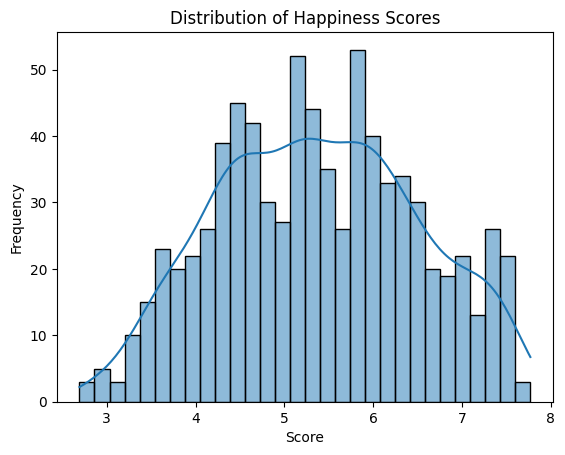

In [135]:
#Happiness Score Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(combined_df["Score"], kde=True, bins=30)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


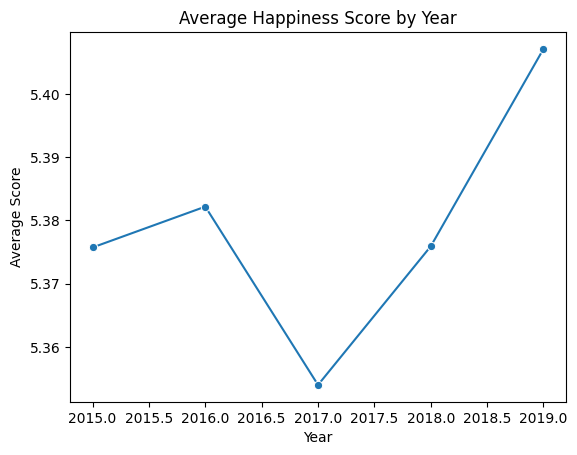

In [136]:
#Yearly trends
avg_by_year = combined_df.groupby("Year")["Score"].mean().reset_index()
sns.lineplot(data=avg_by_year, x="Year", y="Score", marker="o")
plt.title("Average Happiness Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()


C:\Users\kasip\AppData\Local\Temp\ipykernel_30812\3851844882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Score", y="Country", palette="viridis")


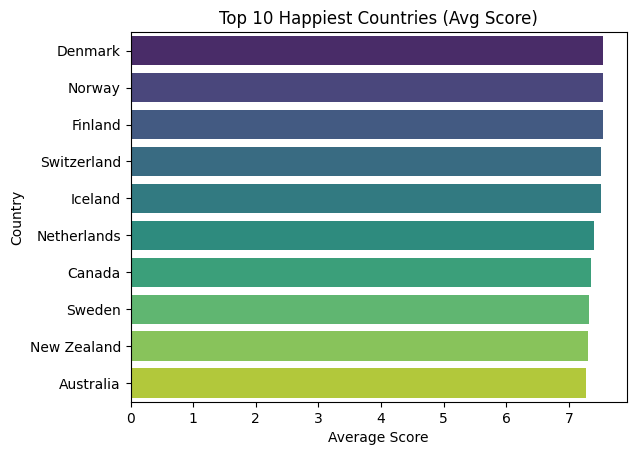

In [137]:
#Top 10 Happiest Countries
top10 = (
    combined_df.groupby("Country")["Score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
sns.barplot(data=top10, x="Score", y="Country", palette="viridis")
plt.title("Top 10 Happiest Countries (Avg Score)")
plt.xlabel("Average Score")
plt.ylabel("Country")
plt.show()


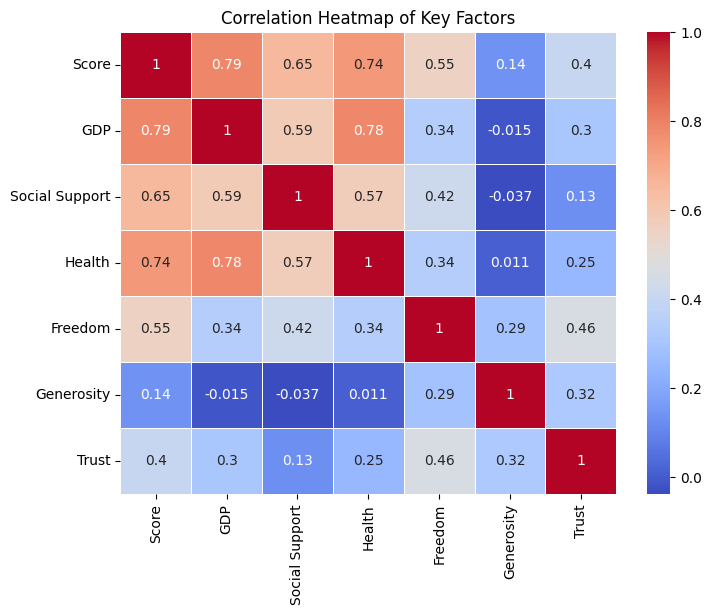

In [138]:
#Correlation Heatmap
corr_cols = ["Score", "GDP", "Social Support", "Health", "Freedom", "Generosity", "Trust"]
corr_matrix = combined_df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()


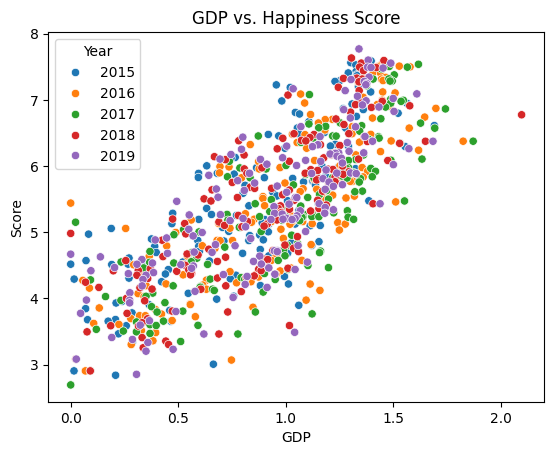

In [139]:
sns.scatterplot(data=combined_df, x="GDP", y="Score", hue="Year", palette="tab10")
plt.title("GDP vs. Happiness Score")
plt.xlabel("GDP")
plt.ylabel("Score")
plt.show()


In [140]:
# Create rank bins (quartiles)
# Note: Lower rank number indicates higher happiness, so adjust labels accordingly if needed.
combined_df['Rank Bin'] = pd.qcut(combined_df['Rank'], q=4, labels=['Top (Best)', 'Upper Middle', 'Lower Middle', 'Bottom (Worst)'])

# Optional: Check distribution of rank bins
print(combined_df['Rank Bin'].value_counts())


Rank Bin
Top (Best)        200
Upper Middle      195
Lower Middle      195
Bottom (Worst)    192
Name: count, dtype: int64


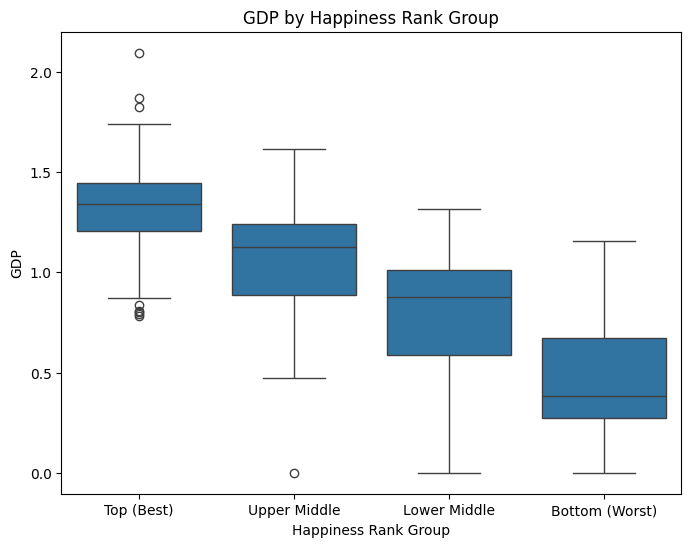

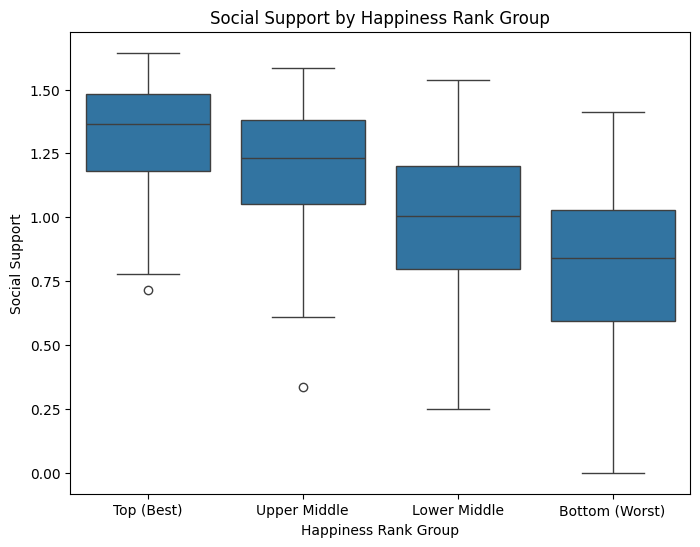

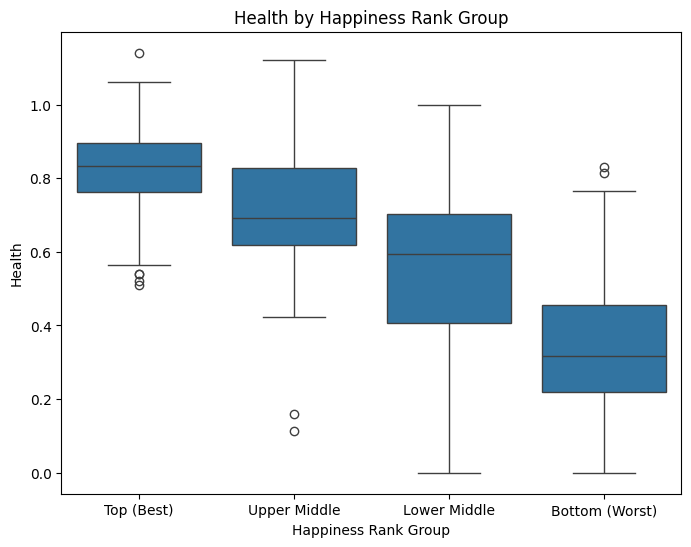

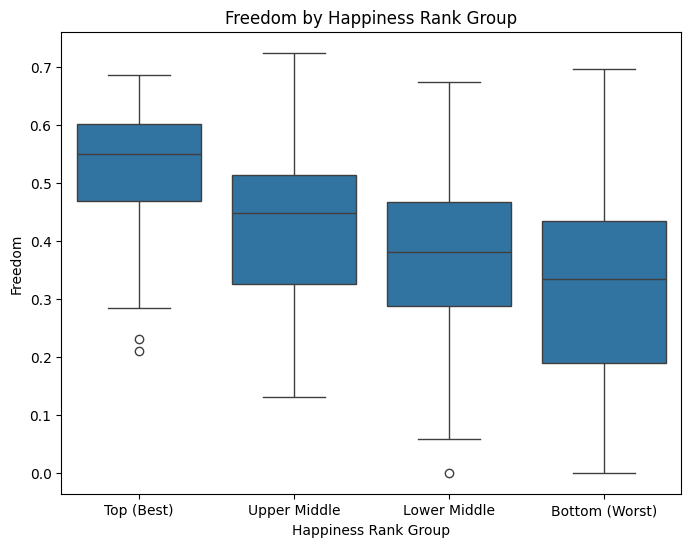

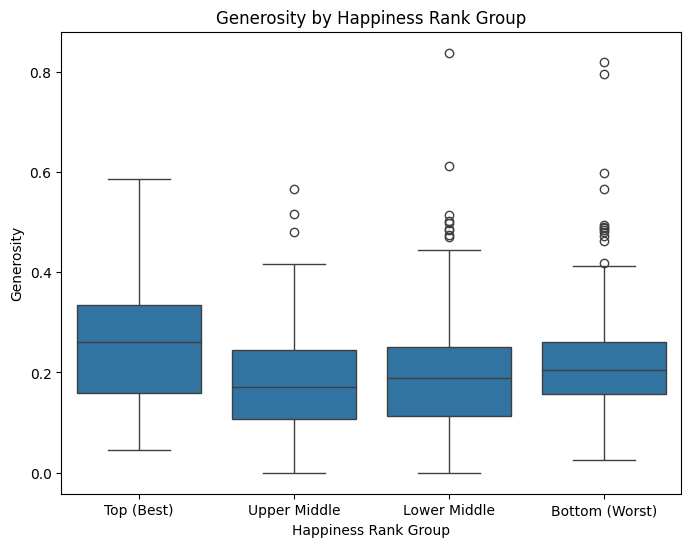

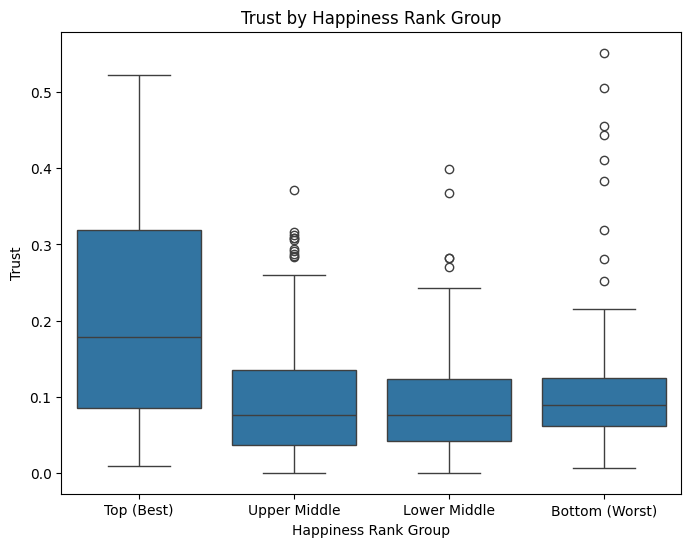

In [141]:
#Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

factors = ["GDP", "Social Support", "Health", "Freedom", "Generosity", "Trust"]

for factor in factors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_df, x="Rank Bin", y=factor)
    plt.title(f"{factor} by Happiness Rank Group")
    plt.xlabel("Happiness Rank Group")
    plt.ylabel(factor)
    plt.show()


Linear Regression Performance:
R² Score: 0.7290550157311768
RMSE: 0.5740832493621234

Random Forest Regressor Performance:
R² Score: 0.7889203228018522
RMSE: 0.5067077280354813


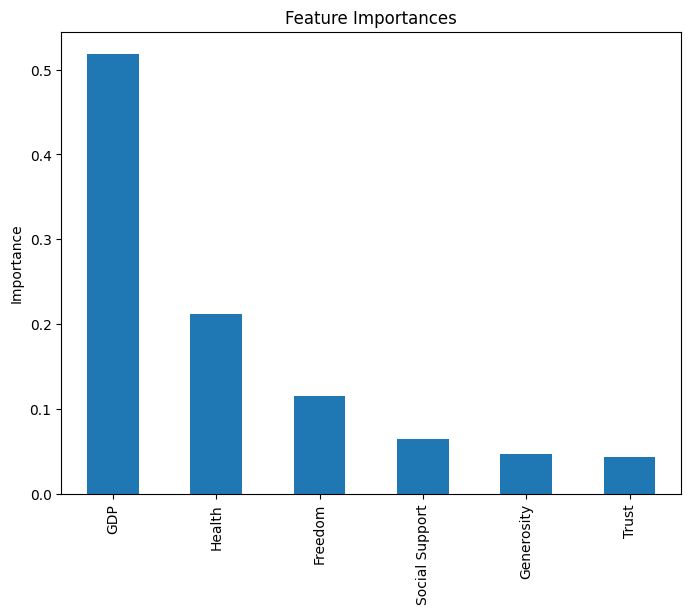

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ----
# Step 1: Define features and target
# We assume 'combined_df' is your final cleaned DataFrame with the relevant columns.
features = ["GDP", "Social Support", "Health", "Freedom", "Generosity", "Trust"]
target = "Score"  # Predicting Happiness Score

# Select X (predictors) and y (target)
X = combined_df[features]
y = combined_df[target]

# ----
# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----
# Step 3: Build and evaluate a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate metrics for Linear Regression
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Performance:")
print("R² Score:", lr_r2)
print("RMSE:", lr_rmse)

# ----
# Step 4: Build and evaluate a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate metrics for Random Forest
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Regressor Performance:")
print("R² Score:", rf_r2)
print("RMSE:", rf_rmse)

# ----
# Step 5: Visualize Feature Importances from the Random Forest
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=features)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(8, 6), title="Feature Importances")
plt.ylabel("Importance")
plt.show()


In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [144]:
# Reusing X_train, y_train from your previous split
rf_base = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,              # number of random parameter settings to try
    scoring='neg_mean_squared_error',  # or 'r2' if you prefer
    cv=5,                   # 5-fold cross-validation
    random_state=42,
    n_jobs=-1               # use all available CPU cores
)

random_search.fit(X_train, y_train)

# Best model after searching
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [145]:
# best_rf is the best model from RandomizedSearchCV
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

best_r2 = r2_score(y_test, y_pred_best)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Tuned Random Forest Performance:")
print("R² Score:", best_r2)
print("RMSE:", best_rmse)


Tuned Random Forest Performance:
R² Score: 0.7945925011097036
RMSE: 0.4998531859530344


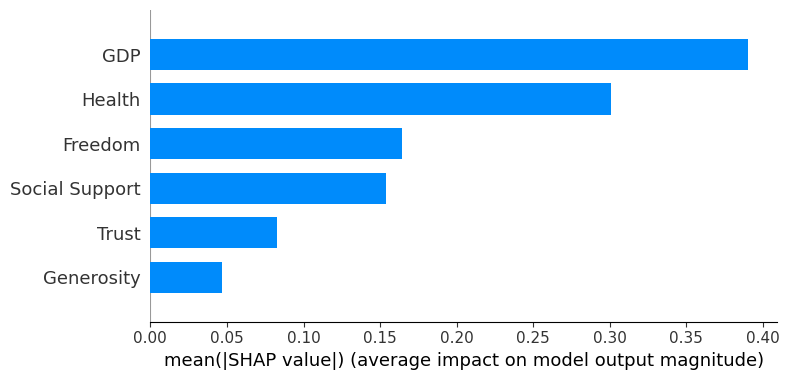

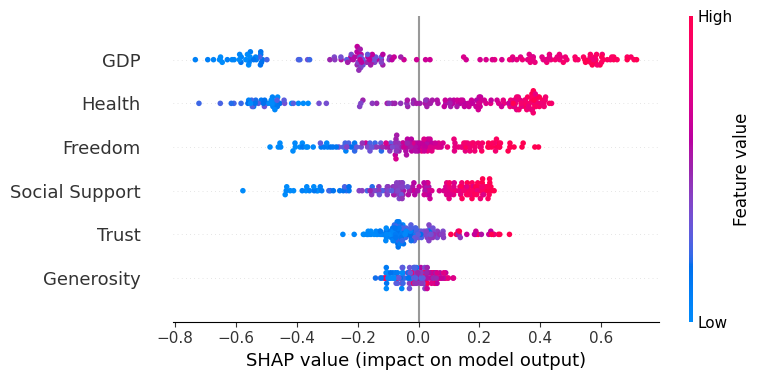

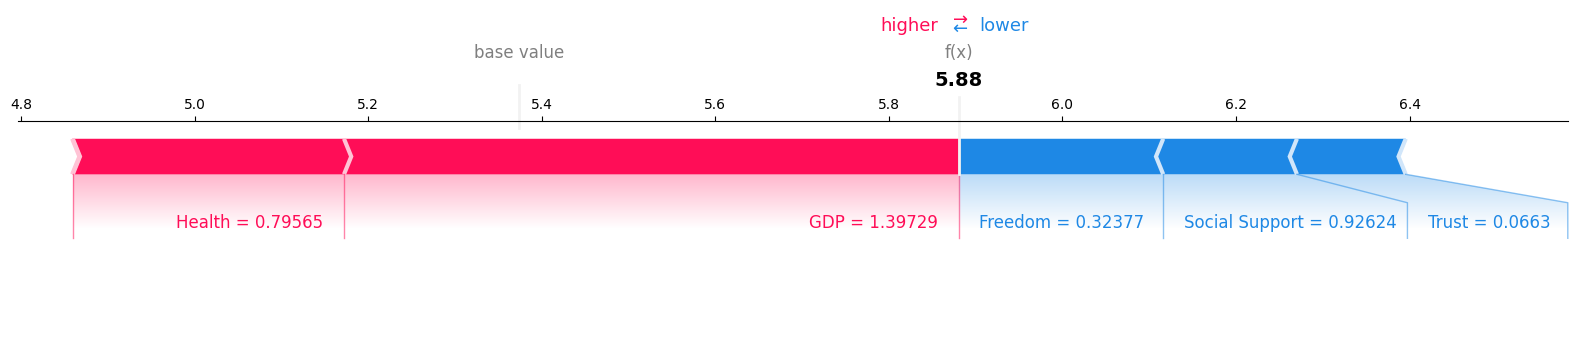

In [146]:
import shap

shap.initjs()

# 1. Create a SHAP explainer for your tuned Random Forest model
explainer_rf = shap.TreeExplainer(best_rf)

# 2. Compute SHAP values for the test set
#    For a regression RandomForest, shap_values should be a 2D array of shape [n_samples, n_features].
shap_values_rf = explainer_rf.shap_values(X_test)

# 3. SHAP Summary Plot (Bar) - global feature importance
shap.summary_plot(
    shap_values_rf, 
    X_test, 
    plot_type="bar", 
    feature_names=features
)

# 4. SHAP Beeswarm Plot - shows the distribution of impacts per feature
shap.summary_plot(
    shap_values_rf, 
    X_test, 
    feature_names=features
)

# (Optional) 5. Local Explanation for a Single Sample
#    For example, pick row index = 10 in the test set
row_idx = 10

# If using Jupyter, you can display an interactive force plot:
shap.initjs()  # loads the necessary JS in a Jupyter environment
shap.force_plot(
    explainer_rf.expected_value,     # base value (mean prediction)
    shap_values_rf[row_idx, :],      # SHAP values for that sample
    X_test.iloc[row_idx, :],         # feature values for that sample
    feature_names=features,
    matplotlib=True
)


In [147]:
import joblib
import os

# Define the path to the models folder
model_path = os.path.join("..", "models", "happiness_rf_model.pkl")  # Go up one level from 'notebooks'

# Save the trained model
joblib.dump(best_rf, model_path)

# Load the model later
loaded_model = joblib.load(model_path)
predictions = loaded_model.predict(X_test)


In [148]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

gbr_r2 = r2_score(y_test, y_pred_gbr)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting R²:", gbr_r2)
print("Gradient Boosting RMSE:", gbr_rmse)


Gradient Boosting R²: 0.7800073349428028
Gradient Boosting RMSE: 0.5172951632692963


In [149]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbr_base = GradientBoostingRegressor(random_state=42)
random_search_gbr = RandomizedSearchCV(
    estimator=gbr_base,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',  # or 'r2'
    cv=5,
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

random_search_gbr.fit(X_train, y_train)

best_gbr = random_search_gbr.best_estimator_
print("Best GBR Params:", random_search_gbr.best_params_)

# Evaluate on test set
y_pred_best_gbr = best_gbr.predict(X_test)
best_gbr_r2 = r2_score(y_test, y_pred_best_gbr)
best_gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_gbr))

print("Tuned Gradient Boosting R²:", best_gbr_r2)
print("Tuned Gradient Boosting RMSE:", best_gbr_rmse)


Best GBR Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.2}
Tuned Gradient Boosting R²: 0.7821066547538352
Tuned Gradient Boosting RMSE: 0.5148210553683763


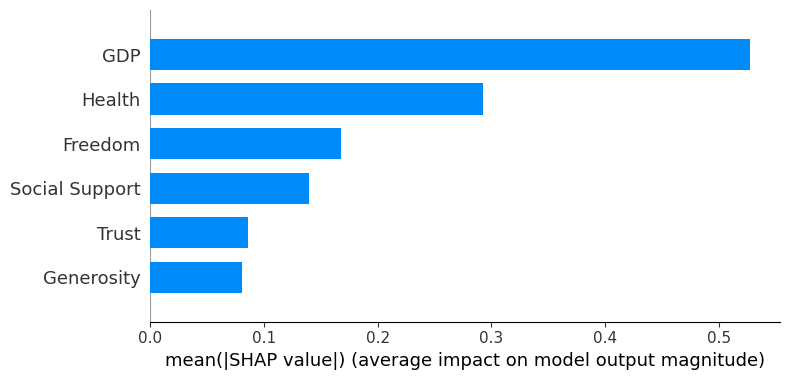

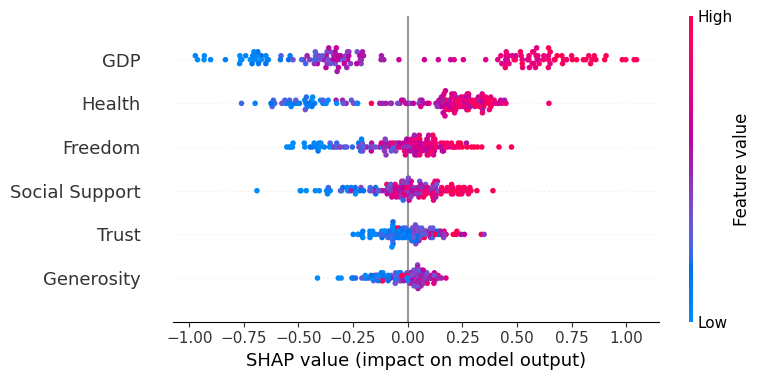

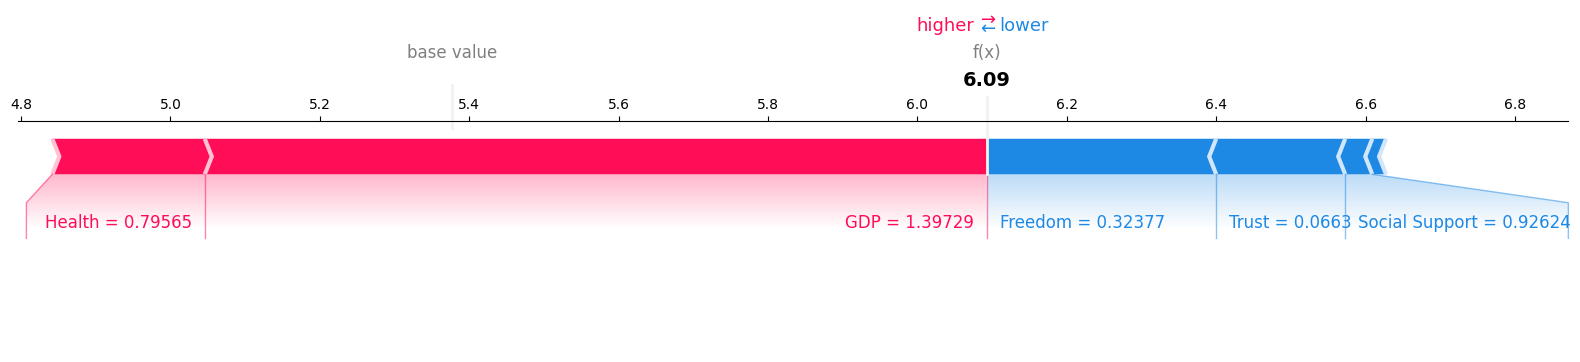

In [150]:


# 1. Create the SHAP explainer for your tuned Gradient Boosting model
explainer_gbr = shap.TreeExplainer(best_gbr)

# 2. Compute SHAP values for the test set
#    For a regression GradientBoosting model, shap_values_gbr is usually a 2D array: [n_samples, n_features]
shap_values_gbr = explainer_gbr.shap_values(X_test)

# 3. SHAP Summary Plot (Bar) - global feature importance
shap.summary_plot(
    shap_values_gbr,
    X_test,
    plot_type="bar",
    feature_names=X_test.columns  # or your feature list
)

# 4. SHAP Beeswarm Plot - shows the distribution of impacts per feature
shap.summary_plot(
    shap_values_gbr,
    X_test,
    feature_names=X_test.columns
)

# (Optional) 5. Local Explanation for a Single Sample
#    For example, pick row index = 10 in the test set
row_idx = 10

# If you're in Jupyter, enable the interactive JS
shap.initjs()

# Generate an interactive force plot for a single sample
shap.force_plot(
    explainer_gbr.expected_value,
    shap_values_gbr[row_idx, :],
    X_test.iloc[row_idx, :],
    feature_names=X_test.columns,
    matplotlib=True
)


In [151]:
import joblib
import os

# Define the relative path to save the model in the 'models' folder
model_path = os.path.join("..", "models", "happiness_gbr_model.pkl")

# Save the tuned Gradient Boosting model
joblib.dump(best_gbr, model_path)
print(f"Gradient Boosting model saved at '{model_path}'")

# (Optional) To load and test the model later:
# loaded_gbr = joblib.load(model_path)
# y_pred_loaded = loaded_gbr.predict(X_test)


Gradient Boosting model saved at '..\models\happiness_gbr_model.pkl'


In [152]:
import xgboost as xgb
import joblib
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Train the XGBoost model (using default hyperparameters for now)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost R²:", xgb_r2)
print("XGBoost RMSE:", xgb_rmse)


XGBoost R²: 0.78393518138167
XGBoost RMSE: 0.5126563557482647


In [153]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_distributions=param_dist_xgb,
    scoring='neg_mean_squared_error',  # or 'r2'
    cv=5,
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
best_xgb = xgb_random.best_estimator_
print("Best XGB params:", xgb_random.best_params_)

# Evaluate best XGB
y_pred_best_xgb = best_xgb.predict(X_test)
best_xgb_r2 = r2_score(y_test, y_pred_best_xgb)
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))

print("Tuned XGB R²:", best_xgb_r2)
print("Tuned XGB RMSE:", best_xgb_rmse)


Best XGB params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Tuned XGB R²: 0.7899387242541498
Tuned XGB RMSE: 0.5054838872871318


In [154]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb, X, y, scoring='r2', cv=5)
print("XGBoost CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


XGBoost CV R² scores: [0.77129472 0.71898664 0.83801595 0.84940196 0.66171896]
Mean CV R²: 0.7678836456645097


In [155]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],       # L1 regularization
    'reg_lambda': [1, 1.5, 2],     # L2 regularization
}

# Create the XGBRegressor
xgb_base = xgb.XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,                # number of parameter settings to try
    scoring='neg_mean_squared_error',  # or 'r2'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all available cores
    verbose=1,                # to see progress
    random_state=42
)

# Fit the random search on your training data
xgb_random_search.fit(X_train, y_train)

# Extract the best model
best_xgb = xgb_random_search.best_estimator_
best_params = xgb_random_search.best_params_

print("Best XGB params:", best_params)

# Evaluate on test set
y_pred_best_xgb = best_xgb.predict(X_test)
best_xgb_r2 = r2_score(y_test, y_pred_best_xgb)
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))

print(f"Tuned XGB R²: {best_xgb_r2:.3f}")
print(f"Tuned XGB RMSE: {best_xgb_rmse:.3f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGB params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Tuned XGB R²: 0.788
Tuned XGB RMSE: 0.507


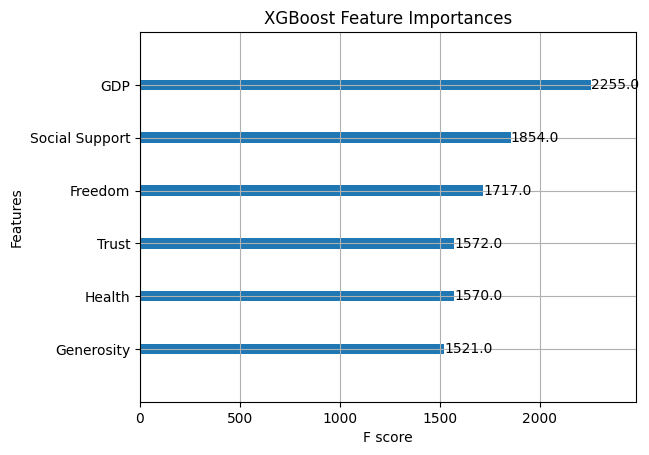

In [156]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb)
plt.title("XGBoost Feature Importances")
plt.show()


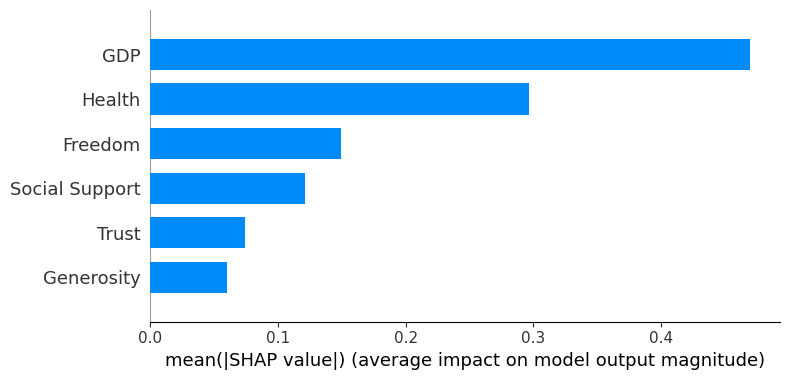

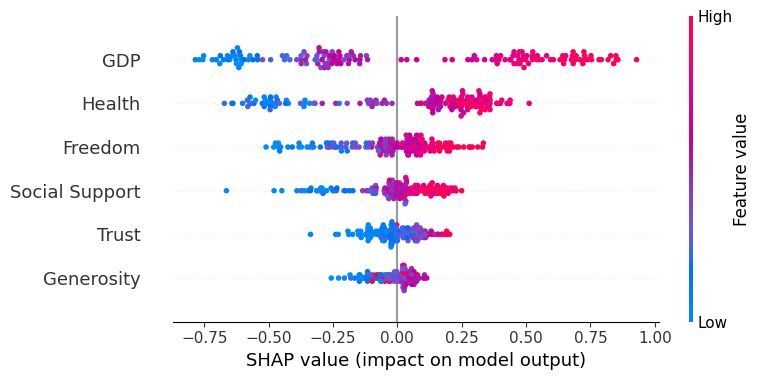

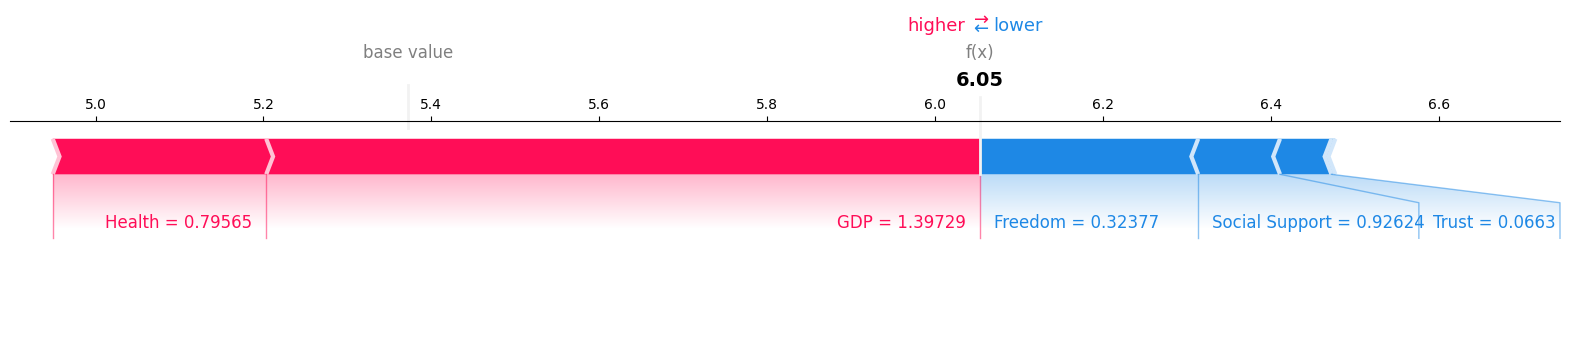

In [157]:
import shap

# 1. Create a SHAP explainer for your best (tuned) XGBoost model
explainer_xgb = shap.TreeExplainer(best_xgb)

# 2. Compute SHAP values for the test set
#    For XGBoost regression, this typically returns a 2D array: [n_samples, n_features]
shap_values_xgb = explainer_xgb.shap_values(X_test)

# 3. Global Explanation (Bar Plot)
shap.summary_plot(
    shap_values_xgb,
    X_test,
    plot_type="bar", 
    feature_names=X_test.columns  # or your 'features' list
)

# 4. Beeswarm Plot for a more detailed distribution view
shap.summary_plot(
    shap_values_xgb,
    X_test,
    feature_names=X_test.columns
)

# (Optional) 5. Local Explanation for a Single Sample
row_idx = 10  # pick a test sample index
shap.initjs()  # enable interactive plots in Jupyter

shap.force_plot(
    explainer_xgb.expected_value,       # base prediction
    shap_values_xgb[row_idx, :],        # SHAP values for this sample
    X_test.iloc[row_idx, :],           # the feature values for this sample
    feature_names=X_test.columns,
    matplotlib=True
)


In [158]:
import joblib
import os
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# 1. Define the path to save the model in the 'models' folder
model_path = os.path.join("..", "models", "happiness_xgb_model.pkl")

# 2. Save the tuned XGBoost model
joblib.dump(best_xgb, model_path)
print(f"✅ XGBoost model saved at '{model_path}'")


✅ XGBoost model saved at '..\models\happiness_xgb_model.pkl'


In [159]:
# 2. Compare the three models on the same test set
models = {
    "RandomForest": best_rf,
    "GradientBoosting": best_gbr,
    "XGBoost": best_xgb,
    
}

print("\nModel Comparison on Test Set:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: R² = {r2:.3f}, RMSE = {rmse:.3f}")


Model Comparison on Test Set:
RandomForest: R² = 0.795, RMSE = 0.500
GradientBoosting: R² = 0.782, RMSE = 0.515
XGBoost: R² = 0.788, RMSE = 0.507


In [160]:
import os

# Make predictions and add to the DataFrame
combined_df['Predicted_Score_RF'] = best_rf.predict(X)

# Define the path to the 'data' folder
output_path = os.path.join("..", "data", "world_happiness_predictions.csv")

# Save the DataFrame to the specified path
combined_df.to_csv(output_path, index=False)
print(f"✅ Dataset with predictions saved at '{output_path}'")


✅ Dataset with predictions saved at '..\data\world_happiness_predictions.csv'
